In [32]:
from correlate_tweets import data_for_model

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [33]:
ts_all = data_for_model()

print(ts_all.head())
print('total clinton tweets: {}'.format(ts_all.clinton.sum()))

            trump  clinton  metvi_all  metvi_trump_subj  metvi_trump_obj  \
2016-09-01     12       20   0.833333               1.0              1.0   
2016-09-02      5        9   1.800000               1.0              1.0   
2016-09-03      5        7   1.500000               1.0              0.0   
2016-09-04     14        6        NaN               0.0              0.0   
2016-09-05      6       12   1.000000               1.0              0.0   

            metvi_clinton_subj  metvi_clinton_obj  metvi_msnbc  metvi_cnn  \
2016-09-01                 1.0                1.0          1.5        0.0   
2016-09-02                 0.0                1.5          3.0        2.0   
2016-09-03                 0.0                2.0          3.0        NaN   
2016-09-04                 0.0                0.0          NaN        NaN   
2016-09-05                 0.0                0.0          NaN        2.0   

            metvi_foxnews  
2016-09-01            1.0  
2016-09-02            1.

In [34]:
print('total trump tweets: {}'.format(ts_all.trump.sum()))

total trump tweets: 1017


In [35]:
# ts_all.dropna(inplace=True)
# ts_all.head()

2016-09-01    0.833333
2016-09-02    1.800000
2016-09-03    1.500000
2016-09-04         NaN
2016-09-05    1.000000
Freq: D, Name: metvi_all, dtype: float64


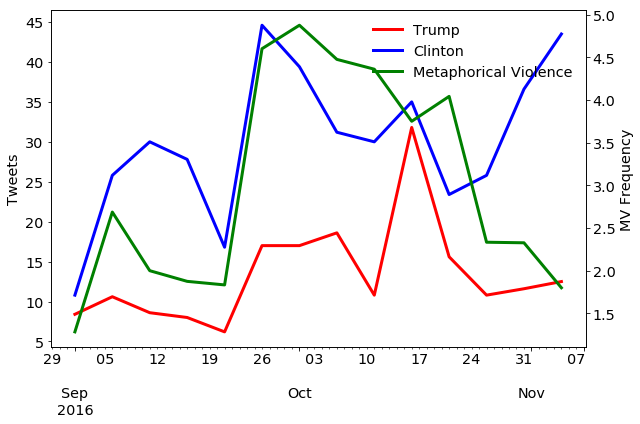

In [36]:
from matplotlib.lines import Line2D
from datetime import datetime

ts_all = ts_all[ts_all.index < datetime(2016,11,9)]

fig, ax1 = plt.subplots(figsize=(9,6))
ax2 = ax1.twinx()
ts_all[['trump', 'clinton']].resample('5d').mean().plot(ax=ax1, color=['r', 'b'], lw=3)
print(ts_all['metvi_all'].head())
ts_all['metvi_all'].resample('5d').mean().plot(ax=ax2, color='green', label='MetVi', lw=3)

lines = [
    Line2D([0], [0], color='r', lw=3), 
    Line2D([0], [0], color='b', lw=3),
    Line2D([0], [0], color='g', lw=3)
]
labels = ['Trump', 'Clinton', 'Metaphorical Violence']

ax1.legend(lines, labels, frameon=False)

ax1.set_ylabel('Tweets')
ax2.set_ylabel('MV Frequency');

Text(0,0.5,'MV Frequency (All)')

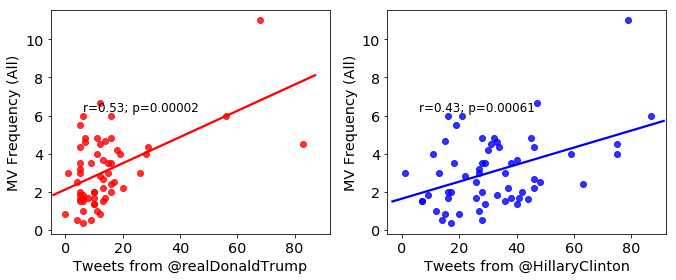

In [37]:
import seaborn as sns

from scipy.stats import pearsonr


fig, axes = plt.subplots(1, 2, figsize=(9.5, 4))

xl = 'trump'; yl = 'metvi_all'
dfcols = ts_all[[xl, yl]].dropna()
x = dfcols[xl]
y = dfcols[yl]
# g = sns.regplot(x=xl, y=yl, data=ts_all, ax=axes[0])
g1 = sns.regplot(x=x, y=y, ax=axes[0], color='red', ci=None)

axes[0].text(6.0, 6.25, 'r={:.2f}; p={:.5f}'.format(*pearsonr(x, y)), fontsize=12)

xl = 'clinton'; yl = 'metvi_all'
dfcols = ts_all[[xl, yl]].dropna()
x = dfcols[xl]
y = dfcols[yl]

# g = sns.regplot(x=xl, y=yl, data=ts_all, ax=axes[0])
g2 = sns.regplot(x=x, y=y, ax=axes[1], color='blue', ci=None)
axes[1].set_ylim(axes[0].get_ylim())
axes[1].set_xlim(axes[0].get_xlim() + np.array([-1.0, 5.0]))
axes[1].text(6.0, 6.25, 'r={:.2f}; p={:.5f}'.format(*pearsonr(x, y)), fontsize=12)
axes[0].set_xlim(axes[1].get_xlim())
plt.subplots_adjust(wspace=2.0)

axes[0].set_xlabel('Tweets from @realDonaldTrump')
axes[1].set_xlabel('Tweets from @HillaryClinton')
axes[0].set_ylabel('MV Frequency (All)')
axes[1].set_ylabel('MV Frequency (All)')
# plt.tight_layout()

## Impact of tweets on different facets of MV use

Above we have regressions of counts of frequency of all metaphorical violence usage against the number of tweets by each 2016 candidate. Now we do the same thing, but for MV frequency on each network and casting each candidate as the subject or object of metaphorical violence.

In [38]:
from correlate_tweets import plot_regressions
ts_all = data_for_model()

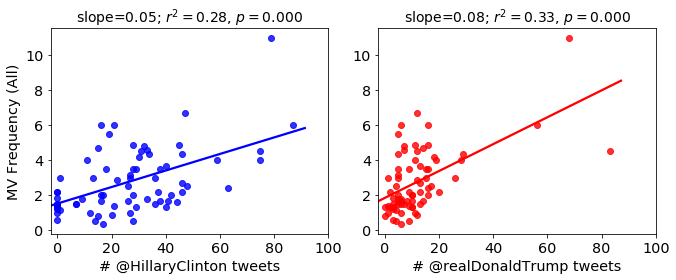

In [39]:
plot_regressions(ts_all, save_path='/Users/mt/Desktop/test-all.pdf')

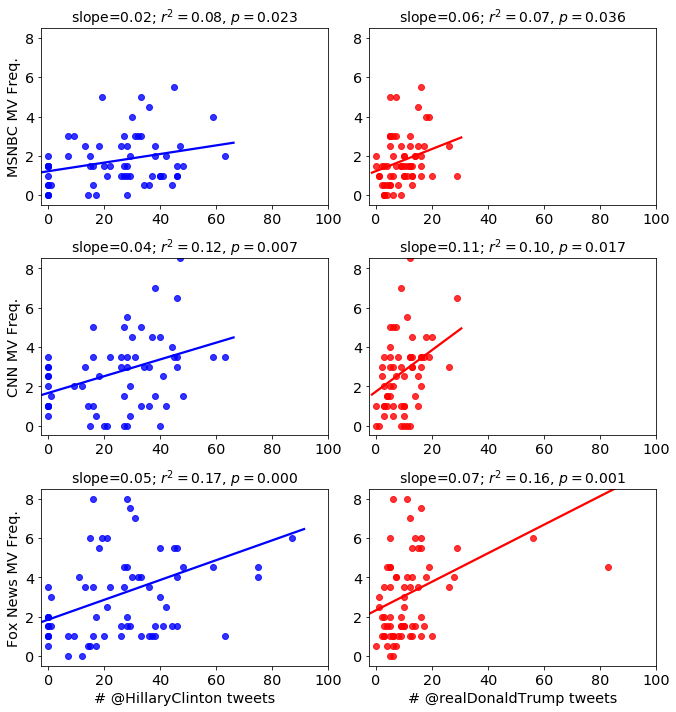

In [40]:
plot_regressions(ts_all, by='network', save_path='/Users/mt/Desktop/test-by-network.pdf')

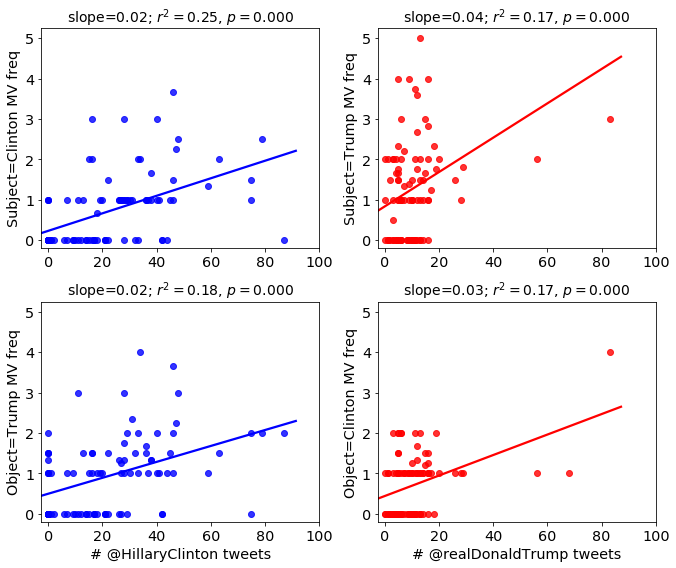

In [41]:
plot_regressions(ts_all, by='subjobj', save_path='/Users/mt/Desktop/test-subjobj.pdf')

## Metvi-Tweet regressions for 2012 

In [42]:
ts_all = data_for_model(year=2012)
ts_all.head()

,romney,obama,metvi_all,metvi_romney_subj,metvi_romney_obj,metvi_obama_subj,metvi_obama_obj,metvi_msnbc,metvi_cnn,metvi_foxnews
2012-09-01,1,24,3.333333,2.0,4.0,0.0,1.0,1.0,4.5,NaN
2012-09-02,5,10,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2012-09-03,1,24,2.500000,0.0,1.0,1.0,0.0,2.5,NaN,NaN
2012-09-04,6,28,2.600000,1.0,2.0,0.0,1.5,1.5,1.0,4.5
2012-09-05,7,27,2.250000,0.0,1.0,1.0,0.0,2.0,2.0,2.5


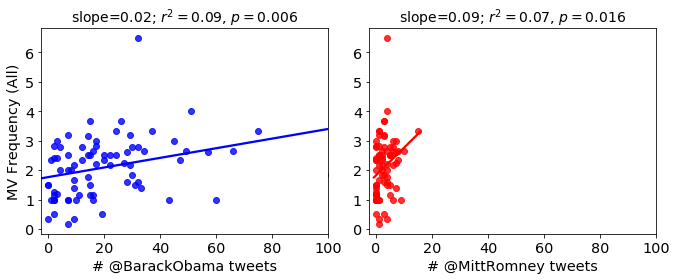

In [43]:
plot_regressions(ts_all, save_path='/Users/mt/Desktop/test-all-2012.pdf', year=2012)

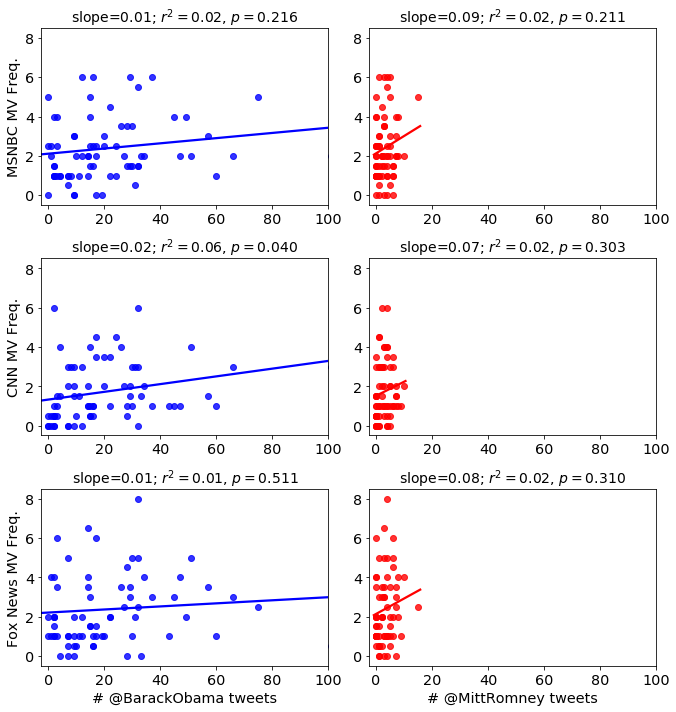

In [44]:
plot_regressions(ts_all, by='network', save_path='/Users/mt/Desktop/test-network-2012.pdf', year=2012)

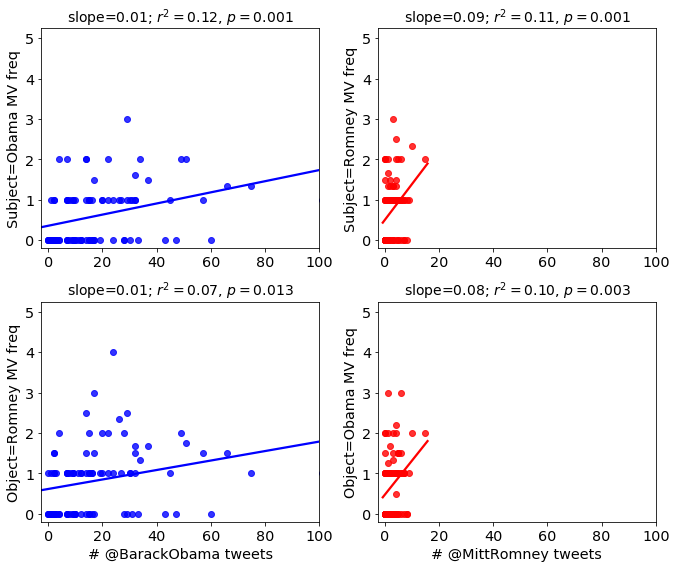

In [45]:
plot_regressions(ts_all, by='subjobj', save_path='/Users/mt/Desktop/test-subjobj-2012.pdf', year=2012)

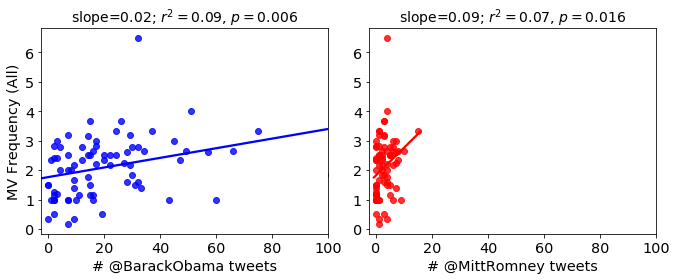

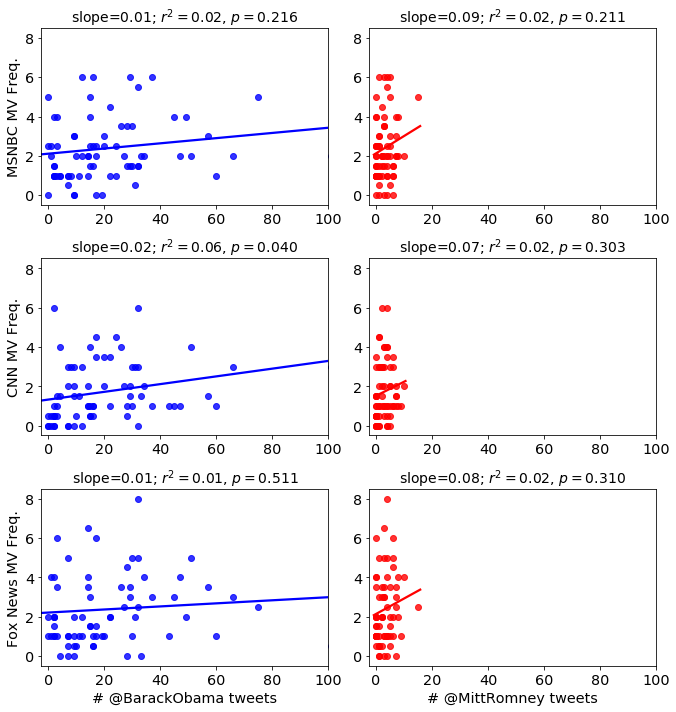

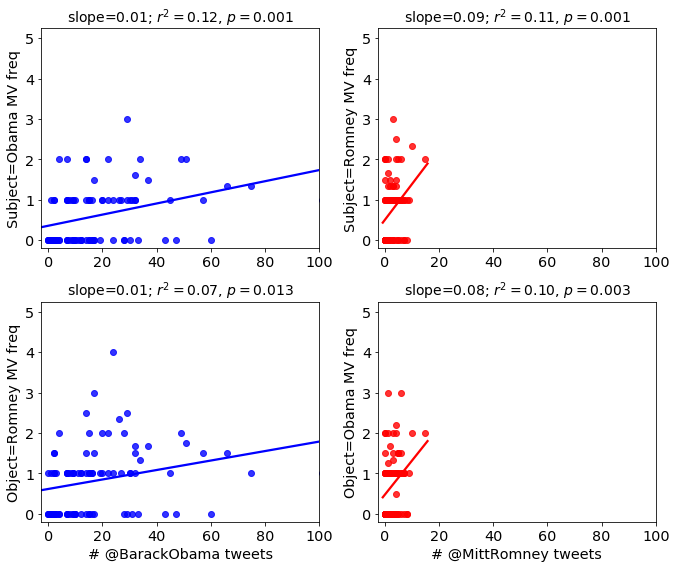

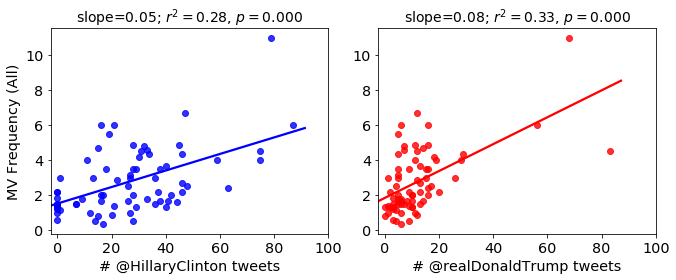

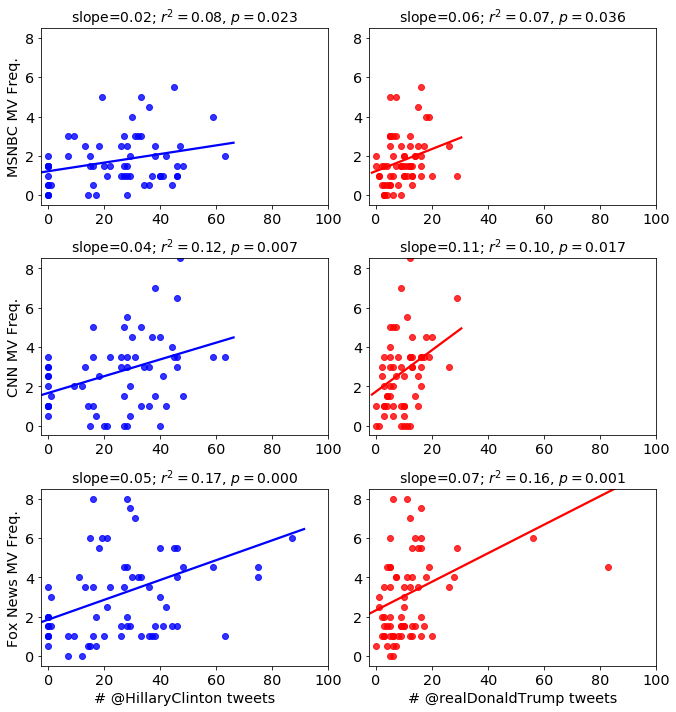

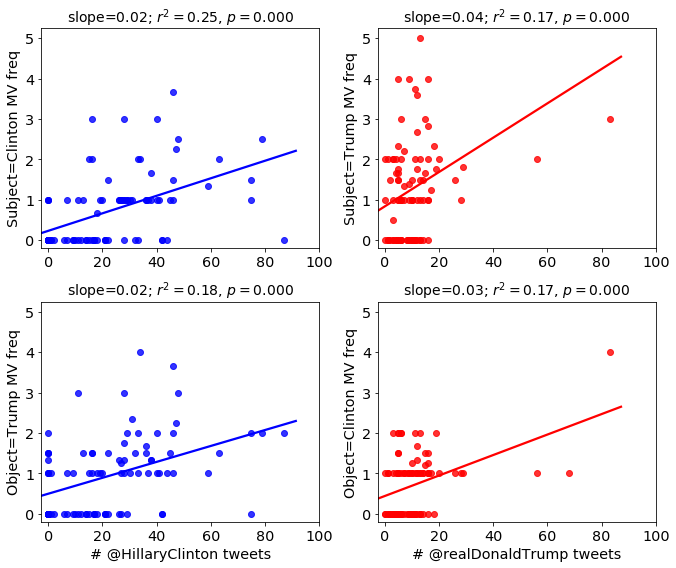

In [46]:
from correlate_tweets import (
    METAPHORS_URL_TEMPLATE, get_project_dataframe, data_for_model,
    plot_regressions
)

for year in [2012, 2016]:
    ts_all = data_for_model(year)
    for by in ['all', 'network', 'subjobj']:

        plot_regressions(
            ts_all, 
            by=by,
            save_path='/Users/mt/workspace/papers/viomet/natHumB/Figures/{}-{}.pdf'.format(
                year, by
            ), 
            year=year
        )